In [3]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import data_exploration as de

In [4]:
aa = pd.read_csv('../DMS_data/aminoacids.csv')
aa.head(20)

,Name,Abbr,Letter,Molecular Weight,Molecular Formula,Residue Formula,Residue Weight,pKa1,pKb2,pKx3,...,VSC,P1,P2,SASA,NCISC,carbon,hydrogen,nitrogen,oxygen,sulfur
0,Alanine,Ala,A,89.10,C3H7NO2,C3H5NO,71.08,2.34,9.69,NaN,...,27.5,8.1,0.046,1.181,0.007187,3,7,1,2,0
1,Cysteine,Cys,C,121.16,C3H7NO2S,C3H5NOS,103.15,1.96,10.28,8.18,...,44.6,5.5,0.128,1.461,-0.036610,3,7,1,2,1
2,Aspartic acid,Asp,D,133.11,C4H7NO4,C4H5NO3,115.09,1.88,9.60,3.65,...,40.0,13.0,0.105,1.587,-0.023820,4,7,1,4,0
3,Glutamic acid,Glu,E,147.13,C5H9NO4,C5H7NO3,129.12,2.19,9.67,4.25,...,62.0,12.3,0.151,1.862,0.006802,5,9,1,4,0
4,Phenylalanine,Phe,F,165.19,C9H11NO2,C9H9NO,147.18,1.83,9.13,NaN,...,115.5,5.2,0.290,2.228,0.037552,9,11,1,2,0
5,Glycine,Gly,G,75.07,C2H5NO2,C2H3NO,57.05,2.34,9.60,NaN,...,0.0,9.0,0.000,0.881,0.179052,2,5,1,2,0
6,Histidine,His,H,155.16,C6H9N3O2,C6H7N3O,137.14,1.82,9.17,6.00,...,79.0,10.4,0.230,2.025,-0.010690,6,9,3,2,0
7,Isoleucine,Ile,I,131.18,C6H13NO2,C6H11NO,113.16,2.36,9.60,NaN,...,93.5,5.2,0.186,1.810,0.021631,6,13,1,2,0
8,Lysine,Lys,K,146.19,C6H14N2O2,C6H12N2O,128.18,2.18,8.95,10.53,...,100.0,11.3,0.219,2.258,0.017708,6,14,2,2,0
9,Leucine,Leu,L,131.18,C6H13NO2,C6H11NO,113.16,2.36,9.60,NaN,...,93.5,4.9,0.186,1.931,0.051672,6,13,1,2,0


In [5]:
#Entfernen von Hydroxyproline und Pyroglutamat
aa_nat = aa.drop(index=[12, 18])
#Speichern der "Letter"-Spalte für Benennung der neuen Spalten
labels_column = 'Letter'
#Entfernen aller nicht-numerischen Spalten und pKx3, da unvollständig
aa_rmv = aa_nat.drop(['Name', 'Abbr','Letter', 'Molecular Formula', 'Residue Formula', 'pKx3'], axis=1)
#Berechnen der Distanzen der AA zueinander
aa_distances = pdist(aa_rmv.values)
#Umschreiben in eine distanzmatrix
aa_matrix = squareform(aa_distances)
#Umwandeln zurück in einen DF zur besseren Übersicht
aa_df = pd.DataFrame(aa_matrix, index=aa_nat[labels_column], columns=aa_nat[labels_column])

In [6]:
aa_df.head(20)

Letter,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
Letter,,,,,,,,,,,,,,,,,,,,
A,0.000000,48.559776,63.813419,89.252945,139.239484,33.998413,106.804696,89.173229,108.928478,89.182282,108.124959,68.523181,39.654088,96.765772,143.526048,22.763896,48.752774,59.454942,201.335873,158.384665
C,48.559776,0.000000,19.389883,41.424068,94.657907,79.112327,59.540721,51.388151,66.657922,51.385270,63.608586,22.017201,9.848005,50.950417,97.009248,27.717049,8.463752,27.911192,155.167944,112.025053
D,63.813419,19.389883,0.000000,29.720348,88.754543,91.532452,50.398845,54.686282,63.665084,54.715779,59.435349,19.085084,26.427427,44.983943,87.992776,41.352081,23.499800,39.842249,146.285339,103.433815
E,89.252945,41.424068,29.720348,0.000000,59.986625,119.501931,21.214236,39.814023,39.006862,39.850138,33.168235,21.716511,49.858206,19.081065,58.461705,68.041055,41.302434,44.139547,116.625077,73.783551
F,139.239484,94.657907,88.754543,59.986625,0.000000,172.301669,39.808561,53.028820,32.311065,53.028279,31.409448,74.127150,102.281253,44.586546,19.226309,121.352543,91.707354,81.056891,62.895681,22.766081
G,33.998413,79.112327,91.532452,119.501931,172.301669,0.000000,138.249875,123.024752,142.272179,123.033387,141.096795,99.906391,70.666434,129.068771,175.567694,51.657319,80.843823,93.323587,233.848598,190.737751
H,106.804696,59.540721,50.398845,21.214236,39.808561,138.249875,0.000000,37.596939,25.191630,37.627060,18.316761,38.561283,67.790576,13.166820,37.979629,86.642625,58.146350,54.593746,96.461523,53.503313
I,89.173229,51.388151,54.686282,39.814023,53.028820,123.024752,37.596939,0.000000,23.561622,0.457759,25.650902,35.925011,56.614967,25.642041,62.540553,74.481854,45.898561,29.720330,115.786400,74.742318
K,108.928478,66.657922,63.665084,39.006862,32.311065,142.272179,25.191630,23.561622,0.000000,23.608595,10.822126,46.501572,73.217791,20.209552,40.012083,91.981157,62.412918,50.610581,94.299090,53.057406


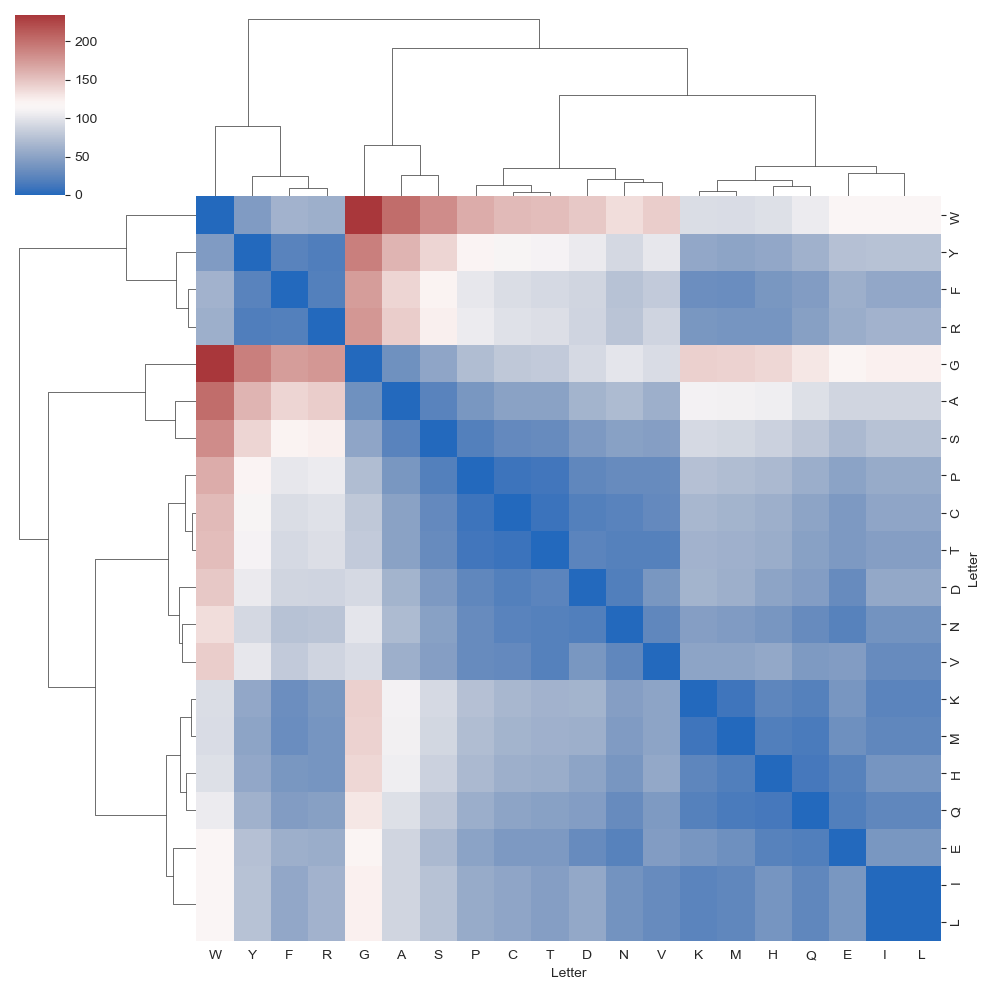

In [8]:
sns.clustermap(aa_df, method="ward" ,cmap="vlag")